In [1]:
import pandas as pd
import numpy as np

In [2]:
# You're getting a UnicodeDecodeError because pandas.read_csv() assumes by default that the file is encoded in UTF-8,
# but your spam.csv file is likely encoded in a different format—commonly
# ISO-8859-1 or latin1, especially with datasets from the internet 
# (like SMS spam collections).

In [3]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
#1 data cleaning 
#2 EDA
#3 Text preprocessing 
#4 bulidng Model 
#5 model Eval
#6 improvement 
#7 WEbsite 
#8 Deployement 

## 1. Data Cleaning 

In [7]:
# to get info about data mainly about hwo many null values are there
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
#drop last three col
#inplace=True tells pandas to modify the original DataFrame directly, 
# without needing to assign the result back to df.
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#renaming the col
#The columns argument expects a dictionary, not a list.
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
#This turns your target column into a binary label (0 or 1) suitable for classification.
df['target']=encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#check missing/null value
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
#checking dupllicate val
df.duplicated().sum()

403

In [16]:
#remove duplicate
df=df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

## 2. EDA

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

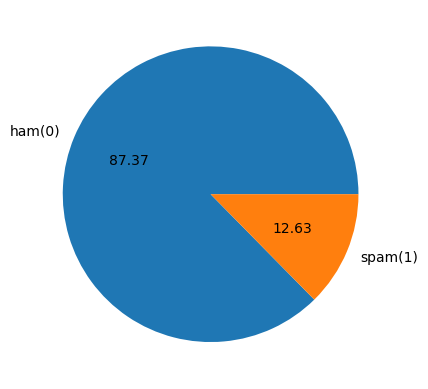

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham(0)','spam(1)'],autopct="%0.2f")
plt.show()

In [22]:
#data is imbalanced we can see as ham is significantly more than spam 

In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [23]:
#natural language toolkit 
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91781\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
#number of characters
df['num_character']=df['text'].apply(len)
# df['tokenized_text'] = df['text'].apply(lambda x: nltk.word_tokenize(x))

In [28]:
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

In [30]:
df.head()

,target,text,num_character,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [31]:
import re

df['sentence_count'] = df['text'].apply(
    lambda x: len([s for s in re.split(r'[.!?]+', x) if s.strip()])
)

In [32]:
df.head()

,target,text,num_character,word_count,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1


In [33]:
df[['num_character','word_count','sentence_count']].describe()

,num_character,word_count,sentence_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,2.304508
std,58.236293,11.068488,1.639932
min,2.000000,1.000000,1.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,22.000000,3.000000
max,910.000000,171.000000,31.000000


In [34]:
df[df['target']==0][['num_character','word_count','sentence_count']].describe()

,num_character,word_count,sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,2.099424
std,56.358207,11.116240,1.510418
min,2.000000,1.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,2.000000
75%,90.000000,18.000000,3.000000
max,910.000000,171.000000,31.000000


In [35]:
df[df['target']==1][['num_character','word_count','sentence_count']].describe()

,num_character,word_count,sentence_count
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,3.722818
std,30.137753,5.967672,1.792465
min,13.000000,2.000000,1.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,4.000000
75%,157.000000,28.000000,5.000000
max,224.000000,35.000000,10.000000


In [36]:
import seaborn as sns


<Axes: xlabel='num_character', ylabel='Count'>

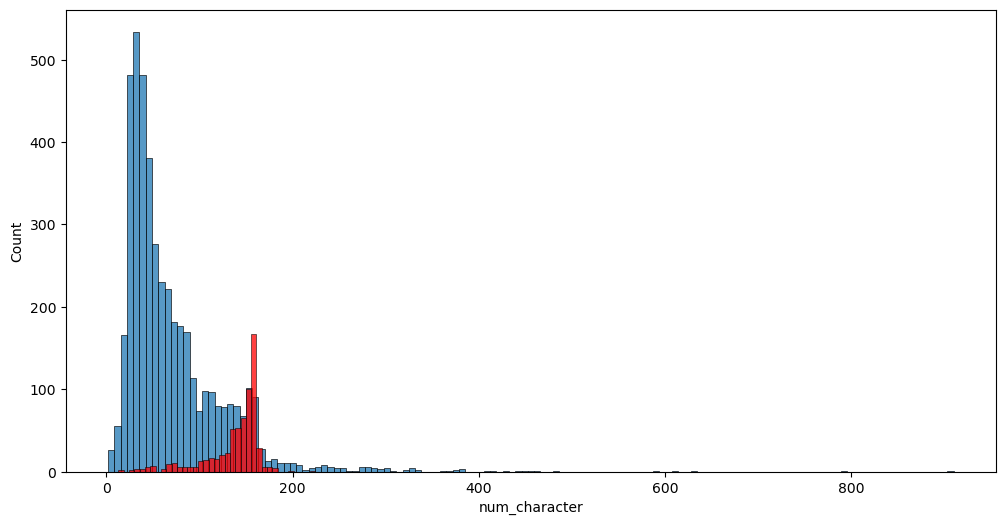

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_character'])
sns.histplot(df[df['target']==1]['num_character'],color='red')

<Axes: xlabel='word_count', ylabel='Count'>

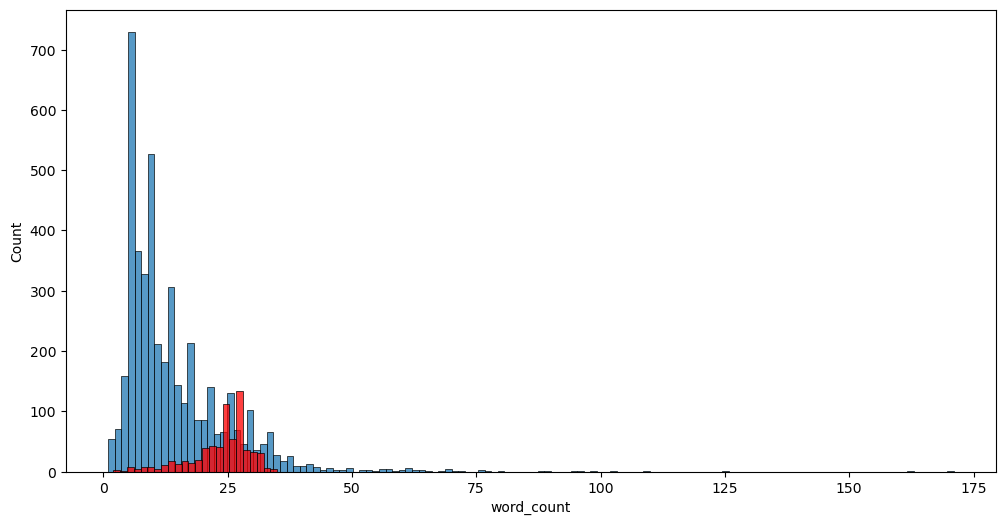

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['word_count'])
sns.histplot(df[df['target']==1]['word_count'],color='red')

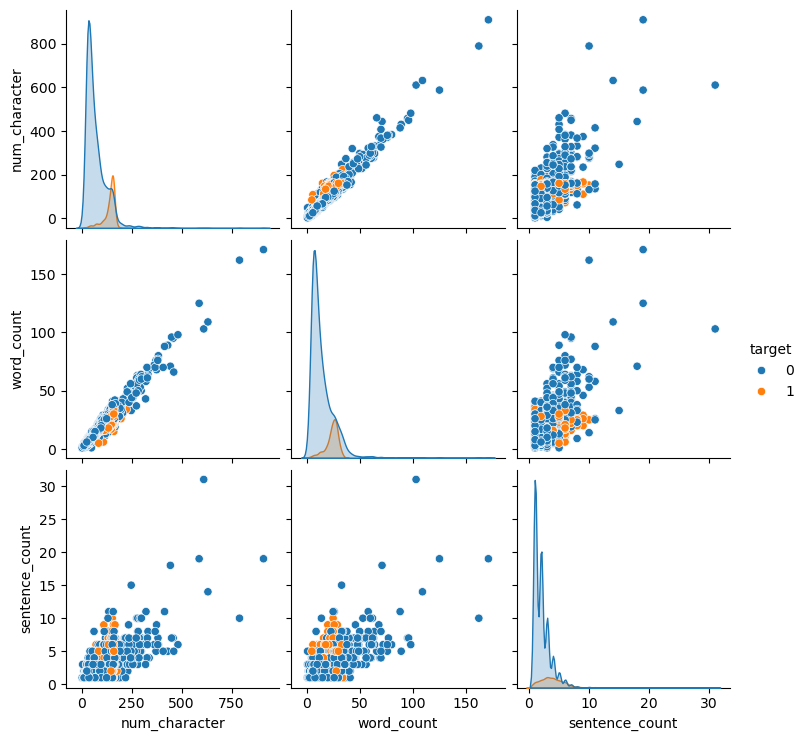

In [39]:
sns.pairplot(df,hue='target')

<Axes: >

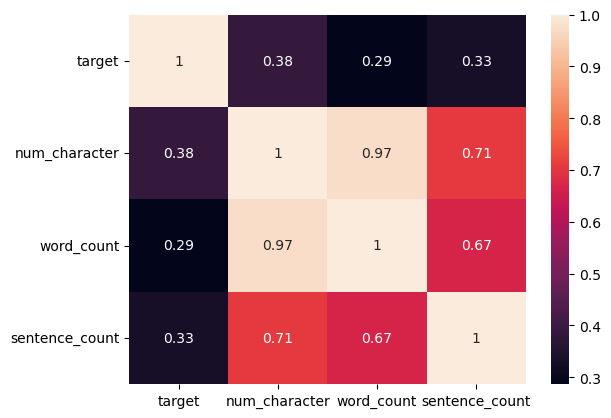

In [40]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)

# Data Preprocessing

The following steps were performed to clean and prepare the text data:

- **Lowercasing**: Converted all text to lowercase to maintain uniformity.
- **Tokenization**: Split text into individual words or tokens.
- **Removing Special Characters**: Removed characters like `@`, `#`, `$`, etc. that do not contribute to analysis.
- **Removing Stop Words and Punctuation**: Eliminated commonly used words (like "and", "the", "is") and punctuations that don't add meaning.
- **Stemming**: Reduced words to their base/root form (e.g., "running" → "run").


In [46]:
def transform_text(text):
    text = text.lower()
    text = text.split()
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords and i not in string.punctuation:
            y.append(stem(i))
    return " ".join(y)

In [42]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [43]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

stopwords = ENGLISH_STOP_WORDS

In [76]:
stopwords

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [47]:
transform_text('Did u know nitish do dance and is still dancing ')

'did u know nitish danc danc'

In [44]:
pip install stemming


Note: you may need to restart the kernel to use updated packages.


In [45]:
from stemming.porter2 import stem

stem("running")  # Output: 'run'


'run'

In [51]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [53]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gonna home soon want talk stuff anymor cri'

In [55]:
df['transform_text']=df['text'].apply(transform_text)

In [56]:
df.head()

,target,text,num_character,word_count,sentence_count,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,jurong avail bugi n great world la e cine got ...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok joke wif u
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entri 2 wkli comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say earli u c
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah think goe live


In [58]:
!pip install wordcloud

In [60]:
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')


In [69]:
spam_wc=wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))

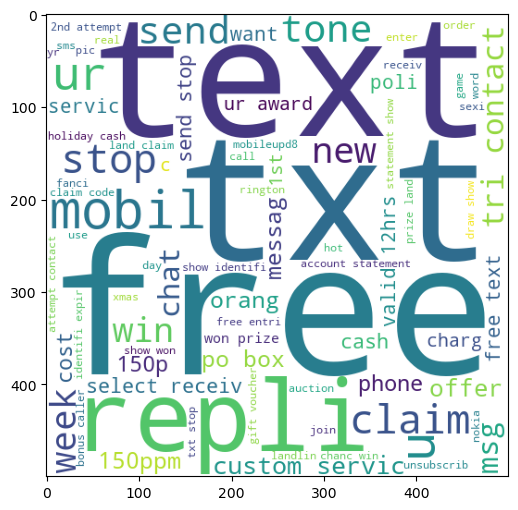

In [70]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [65]:
ham_wc=wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))

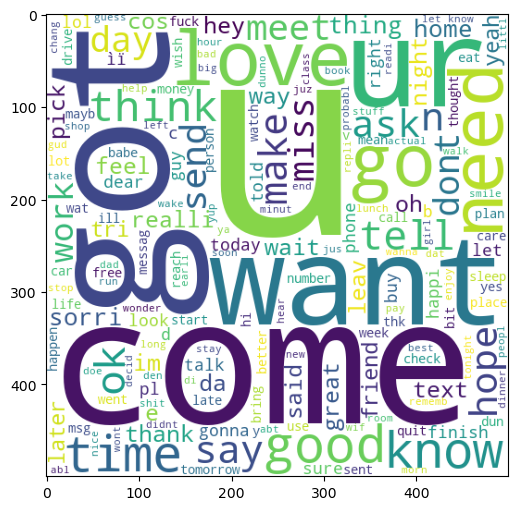

In [67]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [73]:
spam_corpus=[]
for msg in df[df['target']==1]['transform_text'].tolist():
    for word in msg.split():
       spam_corpus.append(word) 

In [87]:
ham_corpus=[]
for msg in df[df['target']==0]['transform_text'].tolist():
    for word in msg.split():
       ham_corpus.append(word) 

In [84]:
len(spam_corpus)

7498

In [88]:
len(ham_corpus)

24516

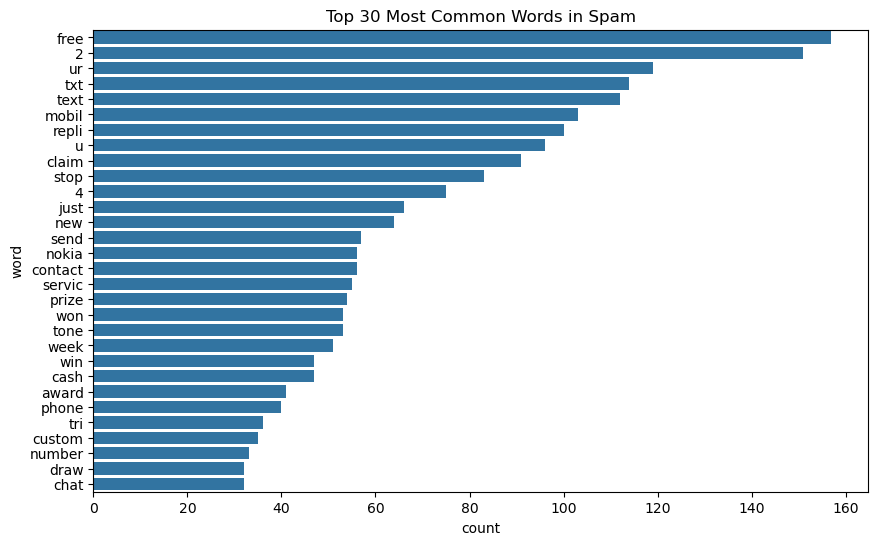

In [81]:
# Get top 30 most common words
top_words = Counter(spam_corpus).most_common(30)

# Convert to DataFrame
top_df = pd.DataFrame(top_words, columns=['word', 'count'])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='word', data=top_df)
plt.title('Top 30 Most Common Words in Spam')
plt.show()

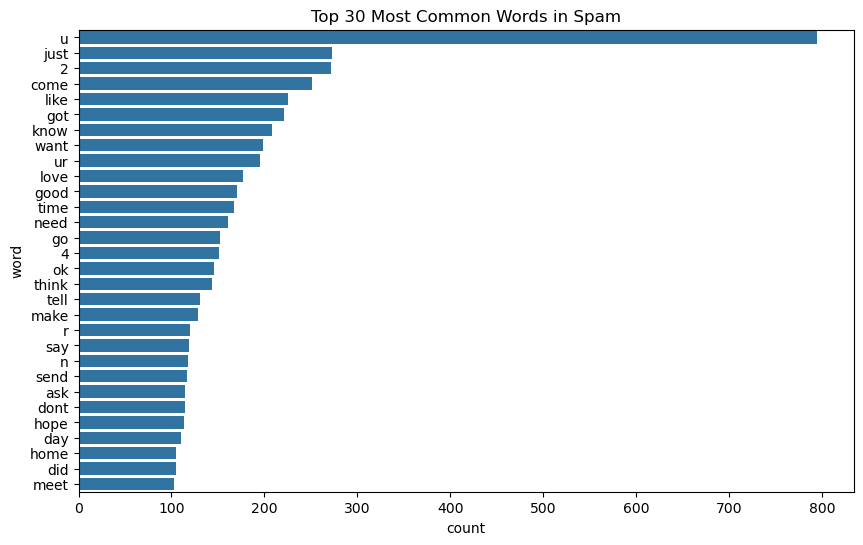

In [89]:
# Get top 30 most common words
top_words = Counter(ham_corpus).most_common(30)

# Convert to DataFrame
top_df = pd.DataFrame(top_words, columns=['word', 'count'])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='word', data=top_df)
plt.title('Top 30 Most Common Words in Spam')
plt.show()

## 4. Model Building 

In [149]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [92]:
X=cv.fit_transform(df['transform_text']).toarray()

In [150]:
new_X=tfidf.fit_transform(df['transform_text']).toarray()

In [93]:
X.shape

(5169, 5531)

In [151]:
new_X.shape

(5169, 3000)

In [94]:
y=df['target'].values

In [95]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [96]:
from sklearn.model_selection import train_test_split

In [98]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [152]:
X_train1,X_test1,y_train1,y_test1=train_test_split(new_X,y,test_size=0.2,random_state=2)

In [153]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [154]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [110]:
gnb.fit(X_train,y_train)

y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.7833655705996132
[[693 203]
 [ 21 117]]
0.365625


In [155]:
gnb.fit(X_train1,y_train1)
y_pred_td=gnb.predict(X_test1)
print(accuracy_score(y_test1,y_pred_td))
print(confusion_matrix(y_test1,y_pred_td))
print(precision_score(y_test1,y_pred_td))

0.781431334622824
[[694 202]
 [ 24 114]]
0.36075949367088606


In [103]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9632495164410058
[[877  19]
 [ 19 119]]
0.8623188405797102


In [156]:
mnb.fit(X_train1,y_train1)
y_pred_td2=mnb.predict(X_test1)
print(accuracy_score(y_test1,y_pred_td2))
print(confusion_matrix(y_test1,y_pred_td2))
print(precision_score(y_test1,y_pred_td2))

0.9642166344294004
[[896   0]
 [ 37 101]]
1.0


In [104]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9671179883945842
[[892   4]
 [ 30 108]]
0.9642857142857143


In [157]:
bnb.fit(X_train1,y_train1)
y_pred_td3=bnb.predict(X_test1)
print(accuracy_score(y_test1,y_pred_td3))
print(confusion_matrix(y_test1,y_pred_td3))
print(precision_score(y_test1,y_pred_td3))

0.9729206963249516
[[893   3]
 [ 25 113]]
0.9741379310344828


In [116]:
# we have choose tfid -> Multinomial naive bayes as it has 100% precison...

In [117]:
# now we taking other classification model into discussion to compare with mnb 

In [119]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
    --------------------------------------- 3.7/150.0 MB 21.8 MB/s eta 0:00:07
   -- ------------------------------------- 7.9/150.0 MB 21.2 MB/s eta 0:00:07
   --- ------------------------------------ 12.3/150.0 MB 20.9 MB/s eta 0:00:07
   ---- ----------------------------------- 16.0/150.0 MB 19.7 MB/s eta 0:00:07
   ----- ---------------------------------- 20.4/150.0 MB 19.9 MB/s eta 0:00:07
   ------ --------------------------------- 24.9/150.0 MB 20.0 MB/s eta 0:00:07
   ------- -------------------------------- 28.8/150.0 MB 20.1 MB/s eta 0:00:07
   -------- ------------------------------- 33.3/150.0 MB 20.1 MB/s eta 0:00:06
   ---------- ----------------------------- 37.7/150.0 MB 20.2 MB/s eta 0:00:06
   ----------- ---------------------------- 42.2/150.0 MB 20.2 MB/s eta 0:00:06
   ------------ --------------------------- 46.4/150.0 MB 20.1 MB/s eta 0:00:06
   ------------- -------------------------- 50.3/15

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier 

In [125]:
# Linear Model
lr = LogisticRegression()

# Support Vector Machine
svc = SVC()

#Multinomail Vector 
mnb = MultinomialNB()

# Decision Tree
dt = DecisionTreeClassifier()

# K-Nearest Neighbors
knn = KNeighborsClassifier()

# Random Forest
rf = RandomForestClassifier()

# AdaBoost
adb = AdaBoostClassifier()

# Bagging Classifier
bag = BaggingClassifier()

# Extra Trees Classifier
etc = ExtraTreesClassifier()

# Gradient Boosting Classifier
gb = GradientBoostingClassifier()

# XGBoost Classifier
xgb = XGBClassifier()


In [127]:
clfs = {
    'LR': lr,
    'SVC': svc,
    'MNB':mnb,
    'DT': dt,
    'KNN': knn,
    'RF': rf,
    'ADB': adb,
    'BAG': bag,
    'ETC': etc,
    'GB': gb,
    'XGB': xgb
}


In [162]:
from sklearn.metrics import accuracy_score, precision_score

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    return acc, prec


In [136]:
train_classifier(svc,X_train1,y_train1,X_test1,y_test1)

(0.960348162475822, 0.9801980198019802)

In [163]:
from sklearn.metrics import accuracy_score, precision_score


acc_scores = []
prec_scores = []

for name, clf in clfs.items():
    curr_acc, curr_prec = train_classifier(clf, X_train1, y_train1, X_test1, y_test1)
    # print('For', name)
    # print('Accuracy Score =', curr_acc)
    # print('Precision Score =', curr_prec)
    acc_scores.append(curr_acc)
    prec_scores.append(curr_prec)


C:\Users\91781\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [165]:
from sklearn.metrics import accuracy_score, precision_score


new_acc_scores = []
new_prec_scores = []

for name, clf in clfs.items():
    curr_acc, curr_prec = train_classifier(clf, X_train1, y_train1, X_test1, y_test1)
    # print('For', name)
    # print('Accuracy Score =', curr_acc)
    # print('Precision Score =', curr_prec)
    new_acc_scores.append(curr_acc)
    new_prec_scores.append(curr_prec)


C:\Users\91781\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [166]:
performance_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy': acc_scores,
    'Precision': prec_scores,
})
performance_df = performance_df.sort_values(by='Precision', ascending=False)


In [168]:
performance_df_new = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy_max_F_3000': new_acc_scores,
    'Precision_max_F_3000': new_prec_scores,
})
performance_df_new = performance_df_new.sort_values(by='Precision_max_F_3000', ascending=False)


In [170]:
performance_df=performance_df.merge(performance_df_new,on='Algorithm')

In [171]:
performance_df

,Algorithm,Accuracy,Precision,Accuracy_max_F_3000,Precision_max_F_3000
0,MNB,0.964217,1.000000,0.964217,1.000000
1,SVC,0.965184,0.981132,0.965184,0.981132
2,ETC,0.977756,0.975207,0.975822,0.966942
3,RF,0.973888,0.974359,0.975822,0.966942
4,LR,0.941973,0.953488,0.941973,0.953488
5,KNN,0.902321,0.951220,0.902321,0.951220
6,GB,0.949710,0.947917,0.953578,0.950000
7,XGB,0.961315,0.937500,0.961315,0.937500
8,ADB,0.960348,0.929204,0.959381,0.928571
9,BAG,0.965184,0.925000,0.962282,0.915966


In [172]:
performance_df1=pd.melt(performance_df,id_vars="Algorithm")

In [173]:
performance_df1

,Algorithm,variable,value
0,MNB,Accuracy,0.964217
1,SVC,Accuracy,0.965184
2,ETC,Accuracy,0.977756
3,RF,Accuracy,0.973888
4,LR,Accuracy,0.941973
5,KNN,Accuracy,0.902321
6,GB,Accuracy,0.949710
7,XGB,Accuracy,0.961315
8,ADB,Accuracy,0.960348
9,BAG,Accuracy,0.965184


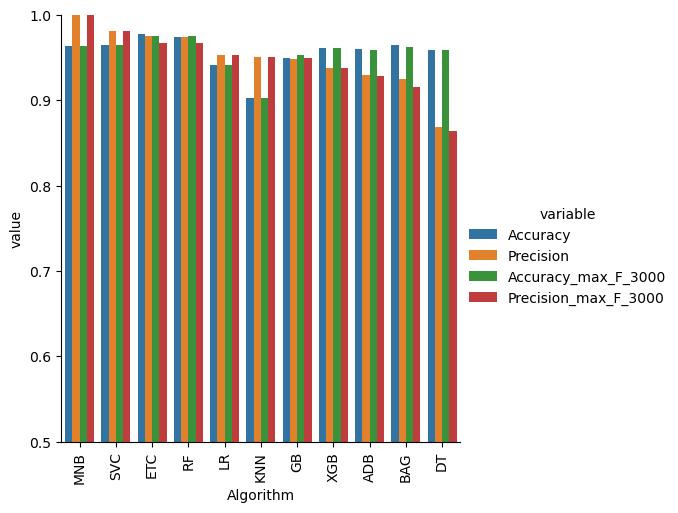

In [174]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# MODEL IMPROVE
# 1.CHANGE THE MAX_FEATURES PARAM OF TFIDF changing it to 3000

In [175]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))